In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import matplotlib.animation as animation
%matplotlib widget

In [30]:
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'', # insert packages here e.g. r'\usepackage{mathrm}'
    "font.family": "serif",
    "font.serif": "cm",
    "font.size": 10,
    "legend.fontsize": 9
})

figwidth_latex_pt = 246.0
inches_per_pt = 1.0/72.27
golden = (np.sqrt(5)-1.0)/2.0
figwidth = figwidth_latex_pt*inches_per_pt
figheight = figwidth*golden
figsize = (figwidth, figheight)
figsize_map = (figwidth, figwidth)

### weak approximation

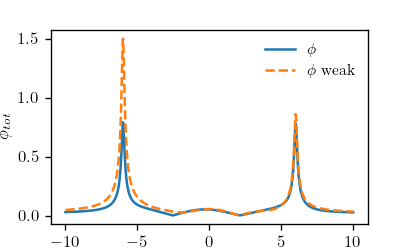

In [43]:
plt.figure(figsize=figsize, dpi=120)

filenpz = "../data/weak_approx.npz"
# filenpz = "../data/weak_approx_NICE.npz"
saveplot = "../data/weak_approx.png"

scattpos = np.load(filenpz)["scattpos"]
alphas = np.load(filenpz)["alphas"]
xx = np.load(filenpz)["xx"]
phitot = np.load(filenpz)["phitot"]
weakphitot = np.load(filenpz)["weakphitot"]
strongphitot = np.load(filenpz)["strongphitot"]

plt.plot(xx, np.abs(phitot), label="$\phi$")
plt.plot(xx, np.abs(weakphitot), '--', label="$\phi$ weak")
# plt.plot(xx, strongphitot, '--', label="total field - strong")

plt.xlabel("x")
plt.ylabel("$\phi_{tot}$")
plt.legend(frameon=False)
plt.show()

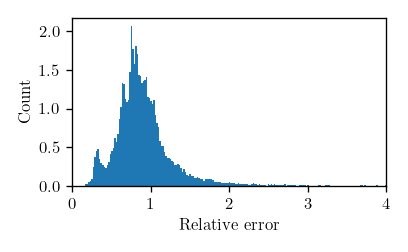

In [45]:
file = np.load("../data/weak_approx_avg.npz")
saveplot = "../data/weak_approx_avg.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), 3000, density=True)
plt.xlim((0, 4))
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

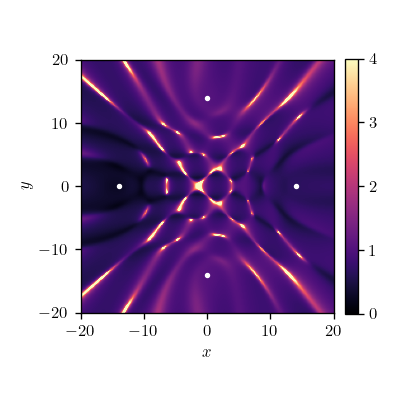

In [46]:
file = np.load("../data/weak_approx_avg.npz")
saveplot = "../data/weak_approx_avg.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
plt.gcf().set_facecolor("white") # set white background
for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='w', s=5)
im = plt.imshow(np.abs(deviationavg),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(0, 4)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout()
plt.savefig(saveplot)
plt.show()

### strong approximation

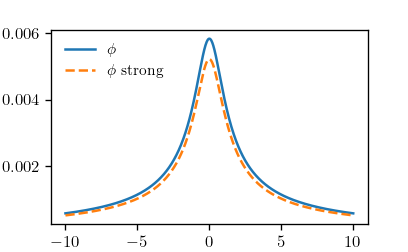

In [42]:
plt.figure(figsize=figsize, dpi=120)

filenpz = "../data/strong_approx.npz"
saveplot = "../data/strong_approx.png"

scattpos = np.load(filenpz)["scattpos"]
alphas = np.load(filenpz)["alphas"]
xx = np.load(filenpz)["xx"]
phitot = np.load(filenpz)["phitot"]
weakphitot = np.load(filenpz)["weakphitot"]
strongphitot = np.load(filenpz)["strongphitot"]

plt.plot(xx, np.abs(phitot), label="$\phi$")
# plt.plot(xx, weakphitot, '--', label="total field - weak")
plt.plot(xx, np.abs(strongphitot), '--', label="$\phi$ strong")

plt.xlabel("x")
plt.ylabel("$\phi_{tot}$")
plt.legend(frameon=False, loc='upper left')
plt.show()

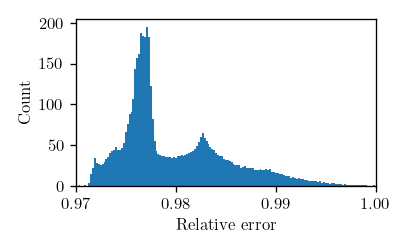

In [35]:
file = np.load("../data/strong_approx_avg.npz")
saveplot = "../data/strong_approx_avg.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), 300, density=True)
plt.xlim(0.97, 1.0)
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

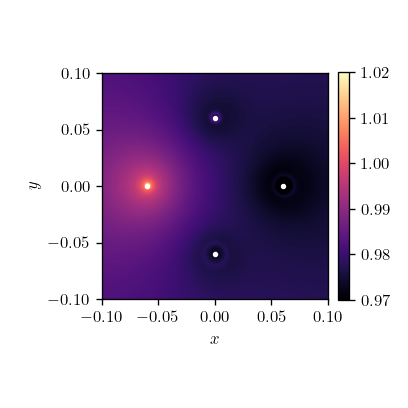

In [36]:
file = np.load("../data/strong_approx_avg.npz")
saveplot = "../data/strong_approx_avg.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
plt.gcf().set_facecolor("white") # set white background
for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='w', s=5)
im = plt.imshow(deviationavg,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(0.97, 1.02)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout()
plt.savefig(saveplot)
plt.show()